## Analyzing used cars' ads in Saudi Arabia

The data used in this project from Kaggle, here: https://www.kaggle.com/datasets/turkibintalib/saudi-arabia-used-cars-dataset


The objective of this analysis is to give insight into used car ads to help you if you think to buy or sell a used car!

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [19]:
car =pd.read_csv("UsedCarsSA_Unclean_EN.csv")

In [6]:
car.head()

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False


In [35]:
## Drop unnassesary columns
car.drop(['Link', 'Negotiable', 'Condition'], axis=1, inplace= True)

In [7]:
car.shape

(8248, 15)

In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
 14  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 910.3+ KB


#### The most important column in data: Price, but the type of this column is object, 
#### before cleaning this column and converting its type, let's look into it: 
#### There's 31% data, the price is negotiable; we can drop them, but before losing this data, we'll analyze other columns

In [9]:
car['Price'].value_counts()

Negotiable    2596
45000          141
35000          127
55000          127
30000          120
              ... 
345000           1
428000           1
169500           1
1000             1
1                1
Name: Price, Length: 549, dtype: int64

In [9]:
car[car['Price'] == 'Negotiable'].shape

(2596, 15)

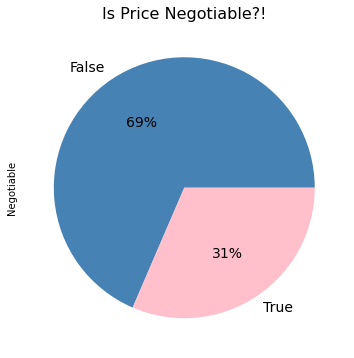

In [14]:
# visualize the percentage of used cars that are Negotiable

Negotiable_figure = car['Negotiable'].value_counts().plot(kind= 'pie', figsize=(6, 6), autopct='%1.0f%%', 
                                              fontsize = 14, colors = ['steelblue', 'pink']);
Negotiable_figure.set_title("Is Price Negotiable?!", fontsize = 16);


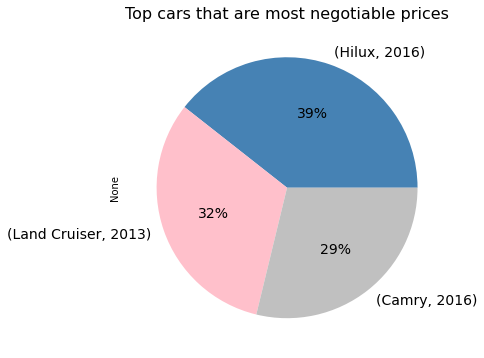

In [63]:
# visualize the cars types that are Negotiable

figure= car[car['Negotiable'] == True][['Type', 'Year']].value_counts()[:3].plot(kind= 'pie', figsize=(6, 6),
                                                                                 autopct='%1.0f%%', 
                                              fontsize = 14, colors = ['steelblue', 'pink', 'silver'])
figure.set_title("Top cars that are most negotiable prices", fontsize = 16);

#### From the previous pie chart, it appears cars from 2013, so will focus on the year column in the following cells

In [69]:
# older car in data
car[car['Year'] == car['Year'].min()]

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
2843,https://syarah.com/%D8%AC%D8%A7%D8%BA%D9%88%D8...,Classic,Jaguar,1936,Other,Bronze,Full,NaN,Gas,Automatic,Used,4750,Tabouk,Negotiable,True


In [71]:
# most older car in data
car[car['Year'] < 2000][['Type', 'Year']].value_counts()

Type          Year
Suburban      1999    10
              1994     7
Cressida      1996     6
Land Cruiser  1997     6
Victoria      1999     5
                      ..
Gloria        1999     1
Fleetwood     1991     1
              1990     1
Eldorado      1968     1
Yukon         1995     1
Length: 164, dtype: int64

In [15]:
# top manufacturing year
year = car.Year.value_counts().to_frame()
year= year.reset_index()
year.rename(columns= {'index': 'Year', 'Year': 'Count'}, inplace= True)
year['Percentage'] = (year.Count / year.Count.sum()).round(2)
year.iloc[:10].style.bar(subset=['Count', 'Percentage'], color='steelblue')

,Year,Count,Percentage
0,2016,1218,0.150000
1,2015,832,0.100000
2,2017,819,0.100000
3,2018,775,0.090000
4,2019,643,0.080000
5,2014,572,0.070000
6,2020,567,0.070000
7,2013,519,0.060000
8,2012,325,0.040000
9,2011,264,0.030000


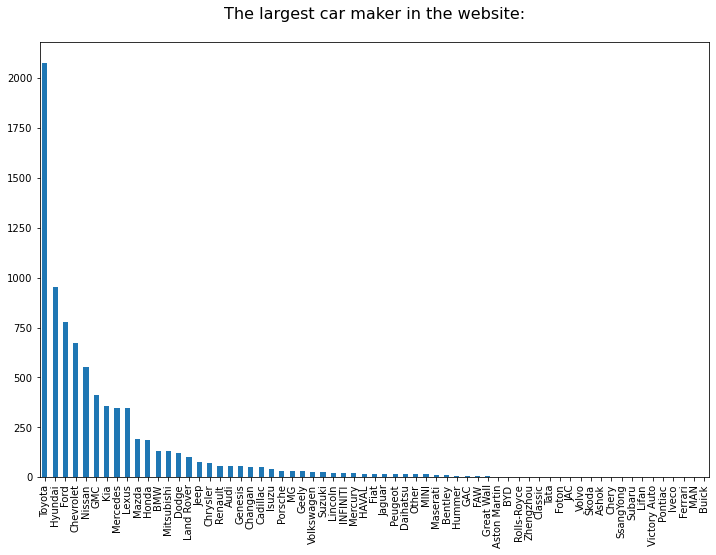

In [101]:
# visulaize car maker 
plt.subplots(figsize=(12,8))
plt.xticks(rotation=50)
plt.title('The largest car maker in the website:' "\n" , size= 16)
car['Make'].value_counts().plot.bar();

## Processing Price Column

In [20]:
# convert any text in price column to null value to drop it , also drop 0 and 1 values
car.Price = car.Price.str.extract(r'([\d:,.]+)')
car.loc[(car.Price == "0") | (car.Price == "1"),'Price'] = np.nan

In [33]:
car.dropna(subset= ['Price'], inplace=True)
car.Price = car.Price.astype('int64')
car.Price

0       114000
2        27500
3        43000
4        59500
5        72000
         ...  
8242     15000
8243     75000
8244     53000
8246     22000
8247     40000
Name: Price, Length: 5650, dtype: int64

## Price distribution for the top car maker since 2018

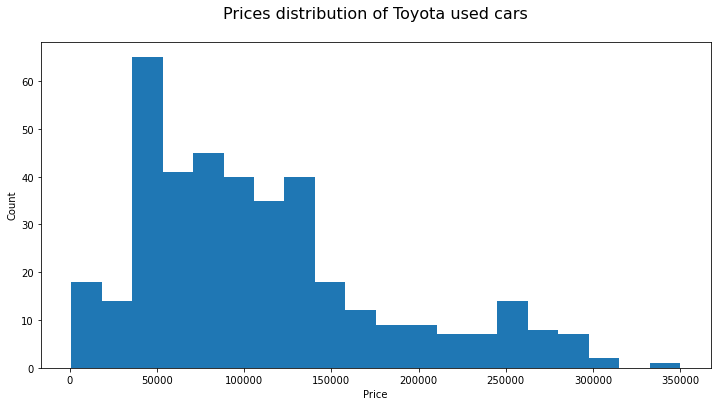

In [52]:
f, ax = plt.subplots(figsize=(12,6))
car[(car.Make == "Toyota") & (car.Year >= 2018)]['Price'].hist(bins=20);
ax.grid(False)
plt.title('Prices distribution of Toyota used cars' "\n", size= 16)
plt.xlabel('Price');
plt.ylabel('Count');
plt.show();

### What's the type cars for the largest car maker?

In [16]:
car[car.Make == "Toyota"].Type.value_counts() / car.shape[0]

Camry                  0.037522
Land Cruiser           0.036106
Hilux                  0.027965
Corolla                0.023540
Furniture              0.015575
Prado                  0.013982
Yaris                  0.013628
Innova                 0.009735
FJ                     0.008496
Avalon                 0.006903
Rav4                   0.006195
Hiace                  0.006018
Land Cruiser Pickup    0.005841
Ciocca                 0.003717
Land Cruiser 70        0.003363
Previa                 0.001593
Coaster                0.001416
Cressida               0.001416
Avanza                 0.001239
Rush                   0.000885
Aurion                 0.000885
Toyota 86              0.000531
Echo                   0.000177
Dyna                   0.000177
C-HR                   0.000177
Tundra                 0.000177
Prius                  0.000177
4Runner                0.000177
Name: Type, dtype: float64

### What are the types of used cars that are not negotiable?

In [37]:
Top_type = pd.pivot_table(car, index=['Make', 'Type'],
                    aggfunc={'Type': np.count_nonzero})
Top_type.rename(columns ={'Type': 'Count'}, inplace= True)
Top_type= Top_type.reset_index().sort_values(by= 'Count', ascending= False)
Top_type

,Make,Type,Count
161,Hyundai,Accent,213
374,Toyota,Camry,212
386,Toyota,Land Cruiser,204
175,Hyundai,Sonata,161
384,Toyota,Hilux,158
...,...,...,...
166,Hyundai,Coupe S,1
301,Mitsubishi,Nativa,1
300,Mitsubishi,Montero,1
298,Mitsubishi,L300,1


### The time serise price of the top car type

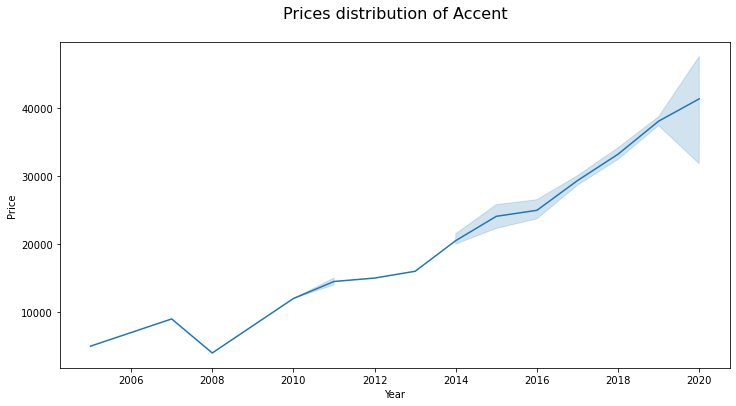

In [38]:
f, ax = plt.subplots(figsize=(12,6))
plt.title('Prices distribution of Accent' "\n", size= 16)
sns.lineplot(x='Year', y="Price", data=car[car.Type == "Accent"]);

### Highlight the expensive prices

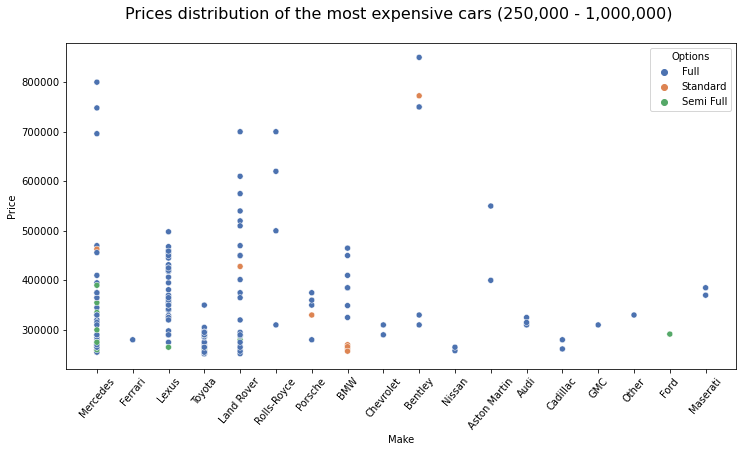

In [161]:
plt.subplots(figsize=(12,6))
plt.xticks(rotation=50)
plt.title('Prices distribution of the most expensive cars (250,000 - 1,000,000) ' "\n", size= 16)
sns.scatterplot(data=car[(car.Price > 250000) & (car.Price <= 1000000)], 
                x="Make", y="Price", hue="Options", palette="deep");